In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization
import keras_tuner as kt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from PIL import Image

In [27]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("navoneel/brain-mri-images-for-brain-tumor-detection")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\aashr\.cache\kagglehub\datasets\navoneel\brain-mri-images-for-brain-tumor-detection\versions\1


In [28]:
encoder = OneHotEncoder(sparse_output=False)
encoder.fit([[0],[1]])

data = []
paths = []
result = []
for r,d,f in os.walk(r"C:\\Users\\aashr\\.cache\\kagglehub\datasets\\navoneel\brain-mri-images-for-brain-tumor-detection\\versions\\1\\yes"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]))



In [29]:
paths = []

for r,d,f in os.walk(r"C:\\Users\\aashr\\.cache\\kagglehub\datasets\\navoneel\brain-mri-images-for-brain-tumor-detection\\versions\\1\\no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]))


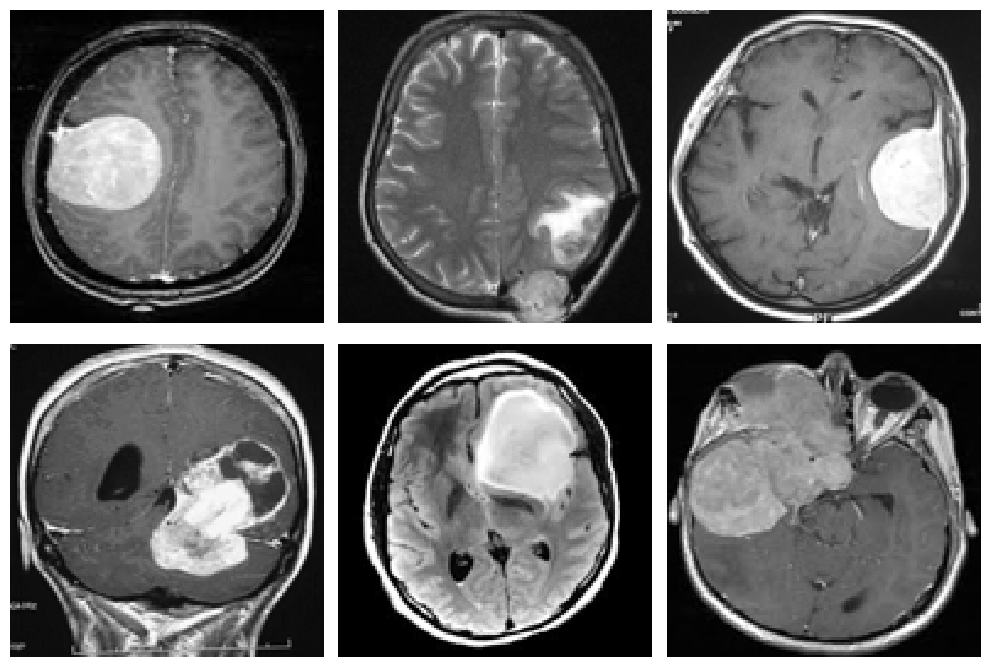

In [30]:
plt.figure(figsize=(10,7))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(data[i], cmap="binary", interpolation="nearest")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [31]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [32]:
result = np.array(result)
result = result.reshape(139,2)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data, result, shuffle=True, test_size=0.2)

In [34]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2,2), padding="Same", input_shape=(128,128,3)))
model.add(Conv2D(32, kernel_size=(2,2), padding="Same", activation="relu"))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(2,2), padding="Same", activation="relu"))
model.add(Conv2D(32, kernel_size=(2,2), padding="Same", activation="relu"))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(2,2), padding="Same", activation="relu"))
model.add(Conv2D(64, kernel_size=(2,2), padding="Same", activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(300, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(2, activation="softmax"))

model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.CategoricalCrossentropy)
print(model.summary())

c:\Users\aashr\Desktop\-\Py\tf-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 64, 64, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 64, 64, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 300)            │     4,915,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           602 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,953,862 (18.90 MB)

 Trainable params: 4,953,734 (18.90 MB)

 Non-trainable params: 128 (512.00 B)

None


In [35]:
history = model.fit(X_train, y_train, epochs=30, verbose=1, validation_split=0.2)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 589ms/step - loss: 5.4284 - val_loss: 10.2637
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 589ms/step - loss: 5.4284 - val_loss: 10.2637
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 523ms/step - loss: 4.7152 - val_loss: 5.0964
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 523ms/step - loss: 4.7152 - val_loss: 5.0964
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 507ms/step - loss: 4.5687 - val_loss: 0.7827
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 507ms/step - loss: 4.5687 - val_loss: 0.7827
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 479ms/step - loss: 1.1092 - val_loss: 1.0417
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 479ms/step - loss: 1.1092 - val_loss: 1.0417
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 476ms/step - loss: 1.2851 - val_loss: 0.5291
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 476ms/step - loss: 1.2851 - val_loss: 0.5291
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 485ms/step - loss: 0.6337 - val_loss: 0.5951
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 485ms/step - loss: 0.6337 - val_los

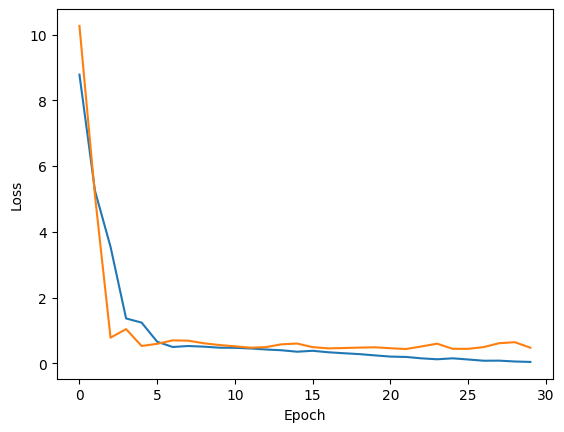

In [36]:
plt.plot(history.history['loss'], label="Test")
plt.plot(history.history['val_loss'], label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [37]:
def names(number):
    if number == 0:
        return 'its a tumor'
    else:
        return 'its not a tumor'

It's with 98.95% confidence that its a tumor


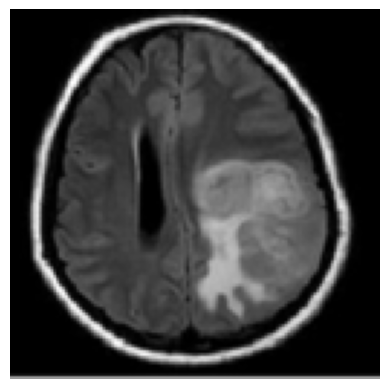

In [46]:
img_path = input("Enter the path to the MRI image: ")
img = Image.open(img_path)
img = img.resize((128,128))
x = np.array(img)
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
confidence = res[0][classification] * 100
plt.imshow(img)
plt.axis("off")
print(f"It's with {confidence:.2f}% confidence that {names(classification)}")